In [2]:
# useful functions to remember


#image = color.rgb2gray(mpimg.imread('data/101_150/0101_1.jpg')) # load image and convert to grayscale

#image = crop_image(image, tol=0.9)

#rot_im = ndimage.rotate(image, 60) # rotate image
#plt.imshow(image, cmap='gray') # show image in grayscale

#mpimg.imsave('foo.png', image, cmap='gray') # save image to file in graysacle



In [4]:
import numpy as np
import cv2
%matplotlib inline

from skimage import color
from skimage import io

from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image


In [5]:
# Look in what columns/rows all pixels are above 0.9. Remove those lines because we dont need them

def crop_image(img,tol=0.9):
    # img is image data
    # tol  is tolerance
    mask = img<tol
    return img[np.ix_(mask.any(1),mask.any(0))]

(308, 701)


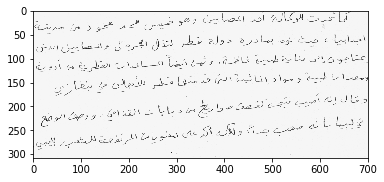

In [25]:
# TURNING IMAGES

def prepare_image(datapath, rot_angle, resize=1):
    image = color.rgb2gray(mpimg.imread(datapath)) # load image and convert to grayscale
    height, width = image.shape # get size of image
    image = cv2.resize(image, dsize=(int(width*resize), int(height*resize)), interpolation=cv2.INTER_CUBIC) # rescale
    image = crop_image(image, tol=0.9) # crop white stuff   
    image = ndimage.rotate(image, rot_angle, cval=1) # rotate image
    return image

img = prepare_image('data/101_150/0102_1.jpg', 0, 0.3)
print(img.shape)


plt.imshow(img, cmap='gray') # show image in grayscale



In [ ]:
from os import listdir
from os.path import isfile, join
import random

onlyfiles = [f for f in listdir('data/101_150/') if isfile(join('data/101_150/', f))] # get list of datanames in folder

counter = 0 # count prepared files, use those as new dataname

random.seed(24601) # seed for reproducibility

angle_list = list()

for dataname in onlyfiles:
    print(counter, end="\r")
    random_angle = random.randint(0, 360) # turn by a random angle (a cute angel != a cute angle)
    angle_list.append(random_angle)
    counter = counter+1
    path = 'data/101_150/'+dataname
    mpimg.imsave('data_prepared/'+str(counter), prepare_image(path,random_angle, 0.3), cmap='gray') # save image to file in graysacle

np.savetxt('data_prepared/angle_list.txt', angle_list, delimiter=',')